# Simple Linear Regression

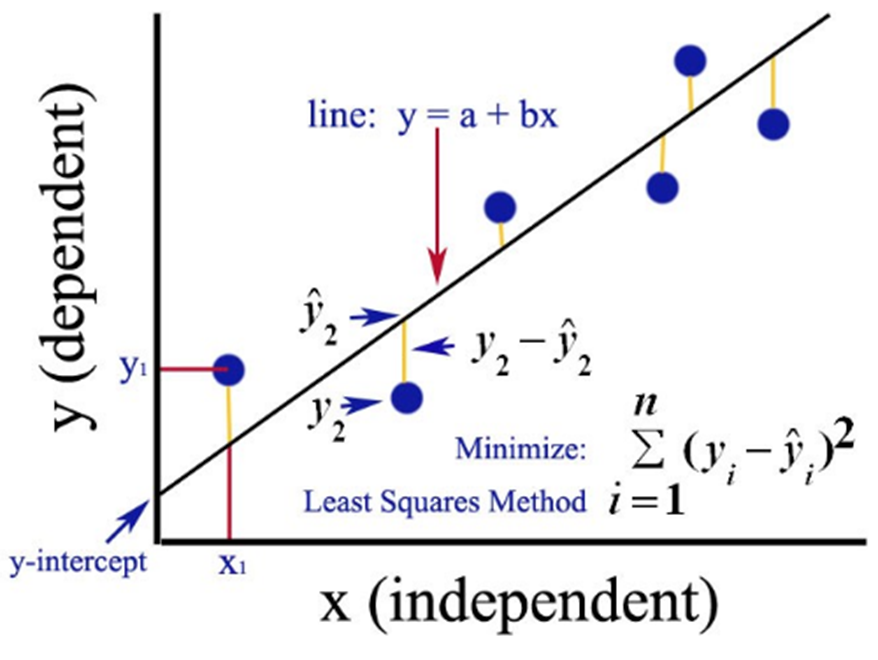

In [ ]:
from warnings import filterwarnings                    # ignore non harmful warnings
filterwarnings("ignore")

# Step 1 - read the input file

In [6]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Step 2 - Data quality Check

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [11]:
df.isnull().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

# Step 3 - performing visualization

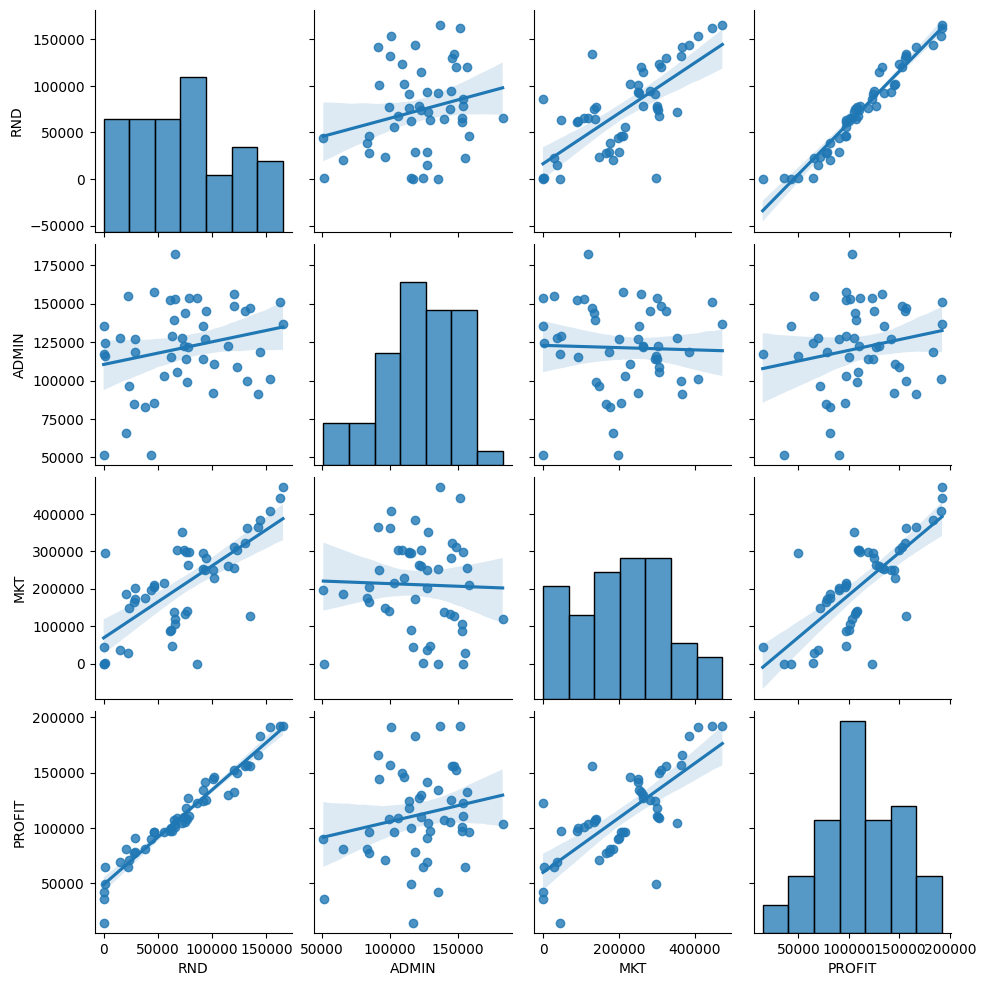

In [19]:
import seaborn as sns
sns.pairplot(df , kind='reg')

In [20]:
df.corr(numeric_only=True)

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


## Profit is dependent on RND  = so we will fit a straight line to the data
## profit = B0 + B1 * RND
## target = profit , predictor = RND


# Step 4 = Seperate x(rnd) and y(profit)

In [30]:
x = df[["RND"]]
y = df[["PROFIT"]]


In [31]:
x.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [32]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


# Step 5 = Apply Machine Learning Model

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

## check slope and intercept

In [ ]:
model.intercept_          # B0

array([49032.89914125])

In [ ]:
model.coef_               # B1

array([[0.85429137]])

In [39]:
type(model.coef_)

numpy.ndarray

# PROFIT_pred = 49032.8 + 0.8543xRND


# If RND increases by 1 unit PROFIT will increase by 0.8543 units on an average
# If RND increase by 1000 unit PROFIT will increase by 854.3 units on an average
# Visulize straight line

In [42]:
import matplotlib.pyplot as plt

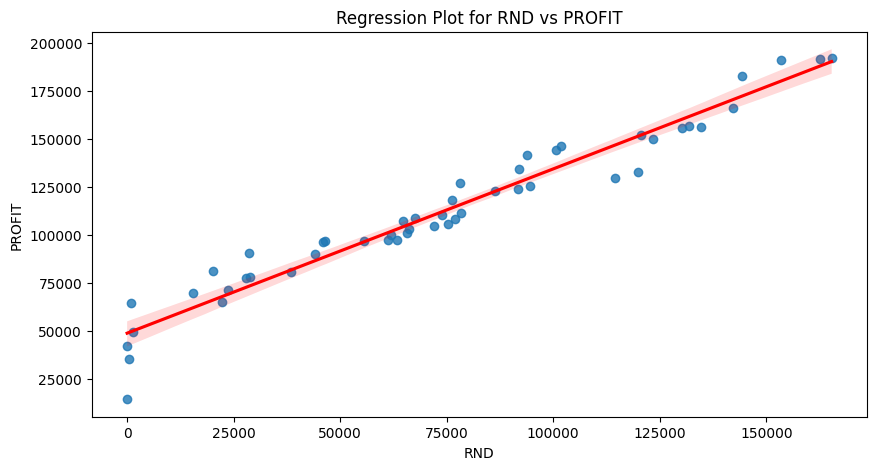

In [44]:
plt.figure(figsize=(10,5))
sns.regplot(data=df , x="RND" , y="PROFIT" , line_kws={"color":"red"})
plt.title("Regression Plot for RND vs PROFIT")
plt.show()


In [48]:
model.score(x, y)              # r2 score   > 80 so good

0.9465353160804393

## Evaluate the model
1. Root mean squared error (RMSE) : Standard error 
2. Mean absolute error (MAE) : Average error
3. Mean absolute percentage error (MAPE) : Average percentage error
4. R2 score : Coefficient of determination

In [50]:
# R2 score
model.score(x,y)

0.9465353160804393

In [53]:

ypred = model.predict(x)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [54]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [51]:

from sklearn.metrics import (
    root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
)

In [55]:

def evaluate_model(model, x, y):
    # Predict the resutls on x
    ypred = model.predict(x)

    # Calculate the metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)

    # Print the results
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE :  {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [56]:
evaluate_model(model , x,y )

RMSE : 9226.10
MAE :  6910.98
MAPE : 11.07%
R2 : 94.65%


# From above result R2 score > 80% hence it is a good model
# Out of sample prediction

In [58]:
x.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [61]:
x.values[0:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [62]:
def predict_result(model, rnd):
    pred = model.predict([[rnd]])
    return pred

In [63]:
predict_result(model , 1_00_000)

array([[134462.03623513]])

In [64]:
predict_result(model, 80_000)


array([[117376.20881636]])